#### Import Packages

In [1]:
import pandas as pd
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
%matplotlib inline

#### Import data and High Level Summary

In [2]:
train = pd.read_csv('../data/train-allstate.csv')
test = pd.read_csv('../data/test-allstate.csv')
print "Test Data\n", test.info()
print "Train Data\n", train.info()

Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB
None
Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB
None


#### Summary Stats on Continuous and Categorical Columns

In [3]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows',1000)
cont_features = [x for x in train.select_dtypes(exclude=['O']).columns if x not in ['id', 'loss']]
print train.describe()
cat_features = [x for x in train.select_dtypes(include=['O']).columns if x not in ['id', 'loss']]
print train.describe(include = ['O'])

                  id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.2811

In [4]:
# what are the unique categorical values and how often do they occur?
for cat_feature in cat_features:
    print train.groupby(cat_feature)[cat_feature].count()

cat1
A    141550
B     46768
Name: cat1, dtype: int64
cat2
A    106721
B     81597
Name: cat2, dtype: int64
cat3
A    177993
B     10325
Name: cat3, dtype: int64
cat4
A    128395
B     59923
Name: cat4, dtype: int64
cat5
A    123737
B     64581
Name: cat5, dtype: int64
cat6
A    131693
B     56625
Name: cat6, dtype: int64
cat7
A    183744
B      4574
Name: cat7, dtype: int64
cat8
A    177274
B     11044
Name: cat8, dtype: int64
cat9
A    113122
B     75196
Name: cat9, dtype: int64
cat10
A    160213
B     28105
Name: cat10, dtype: int64
cat11
A    168186
B     20132
Name: cat11, dtype: int64
cat12
A    159825
B     28493
Name: cat12, dtype: int64
cat13
A    168851
B     19467
Name: cat13, dtype: int64
cat14
A    186041
B      2277
Name: cat14, dtype: int64
cat15
A    188284
B        34
Name: cat15, dtype: int64
cat16
A    181843
B      6475
Name: cat16, dtype: int64
cat17
A    187009
B      1309
Name: cat17, dtype: int64
cat18
A    187331
B       987
Name: cat18, dtype: int64
cat19
A   

#### The log loss is relatively normal
good if we attempt linear models later,
though that would also require adjusting skewness of other cont vars

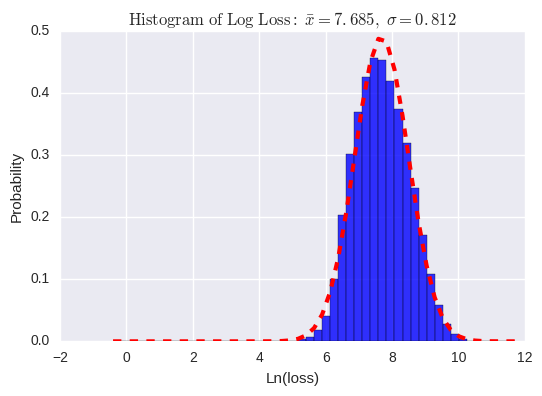

In [5]:
train['log_loss'] = np.log(train['loss'])
(mean, std) = norm.fit(train['log_loss'])
n, bins, patches = plt.hist(train['log_loss'], 50, normed=1, facecolor='blue', alpha=0.8)
y = mlab.normpdf(bins, mean, std)
l = plt.plot(bins, y, 'r--', linewidth=3)

plt.xlabel('Ln(loss)')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ Loss:}\ \bar x=%.3f,\ \sigma=%.3f$' %(mean, std))
plt.show()

#### Checking how variables change with loss and are related to one another

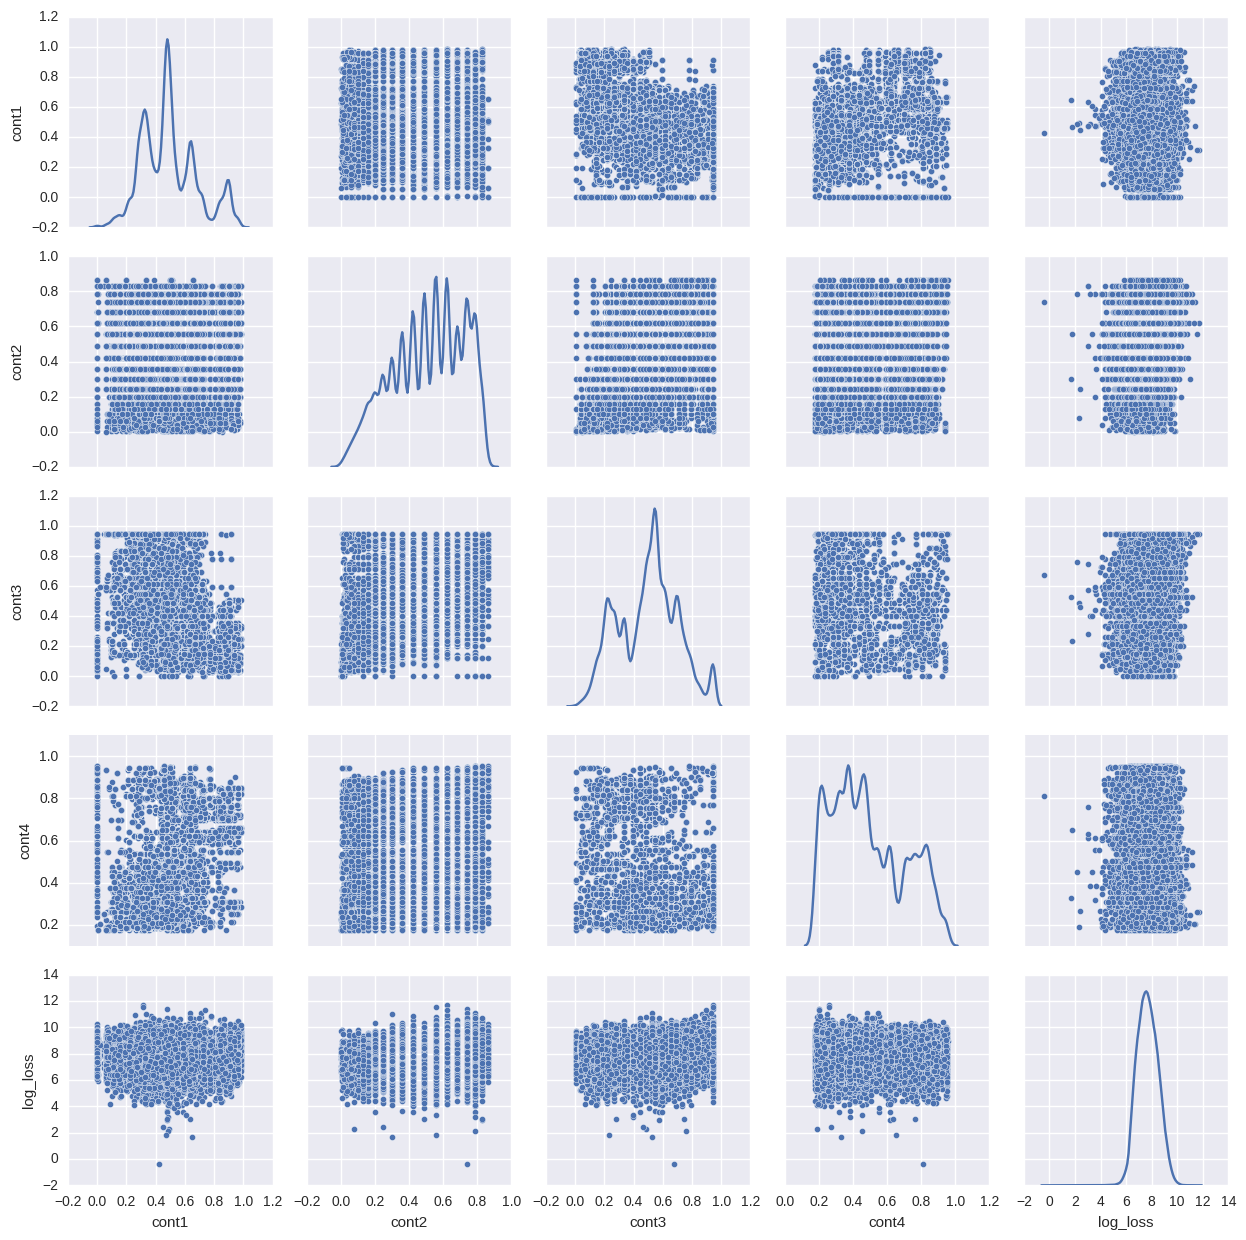

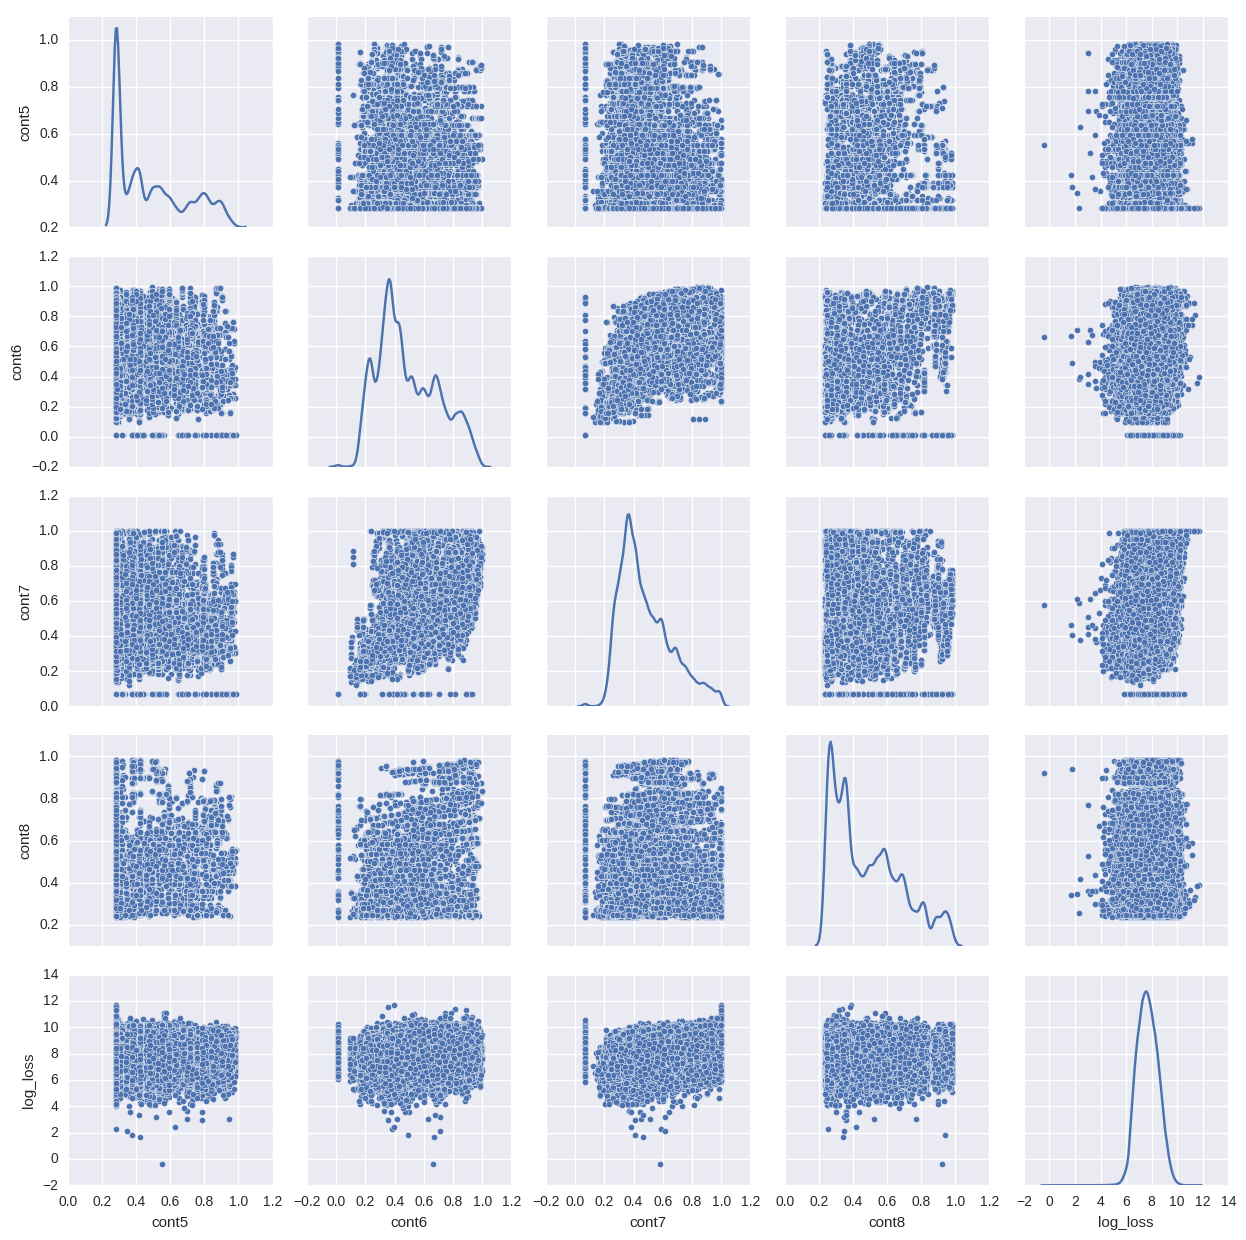

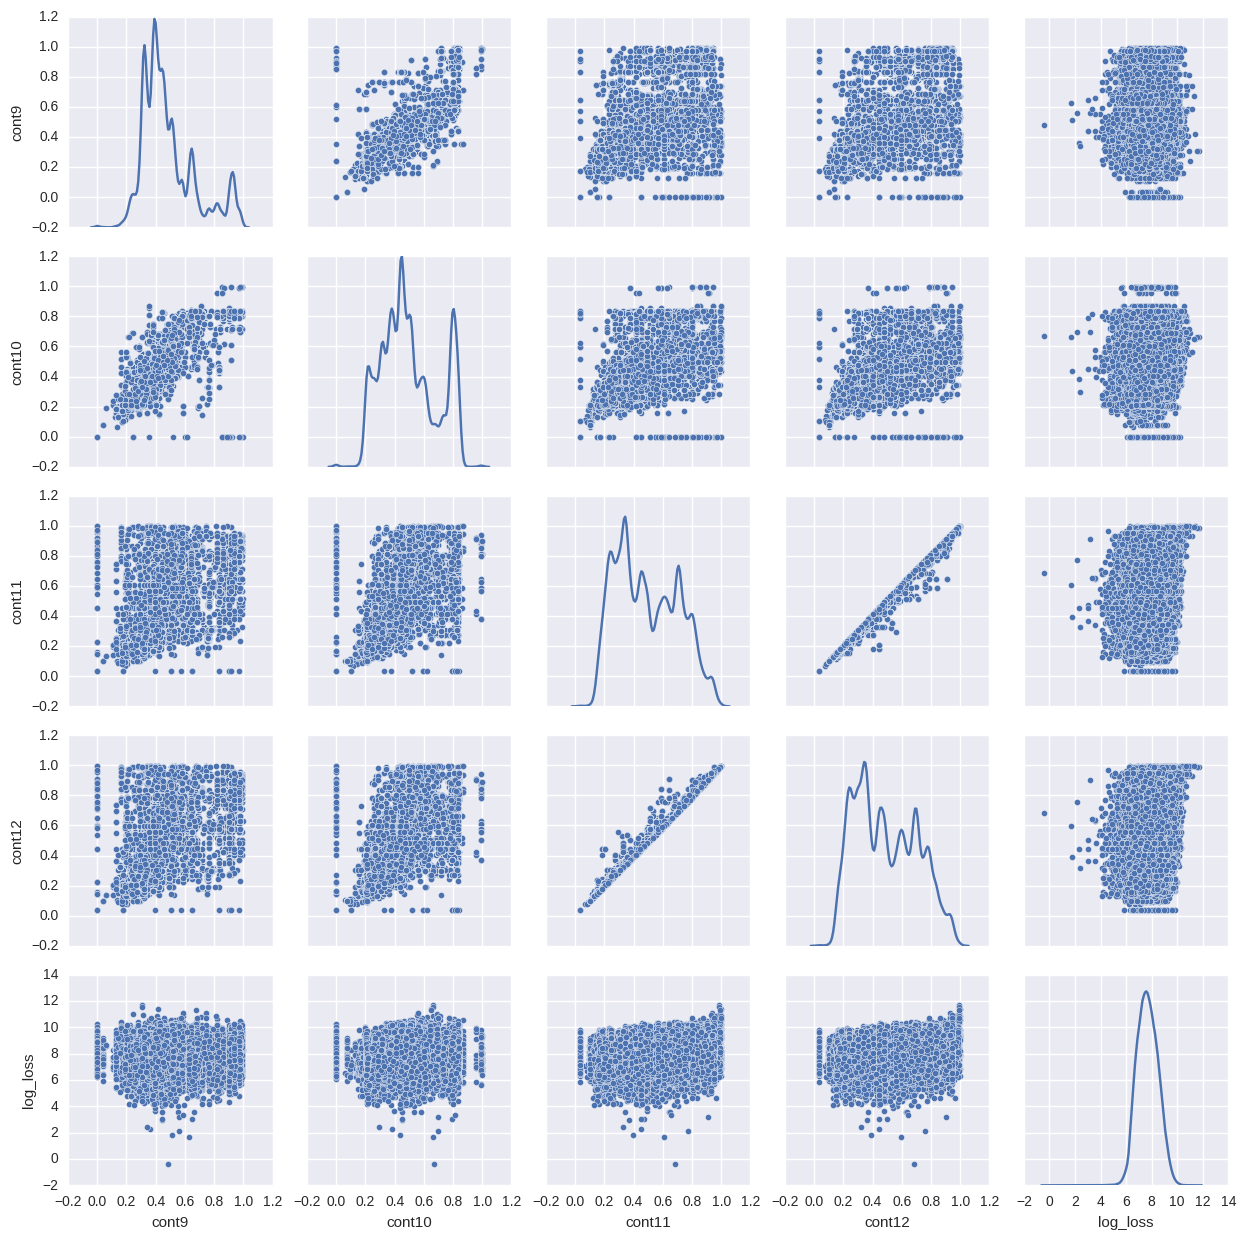

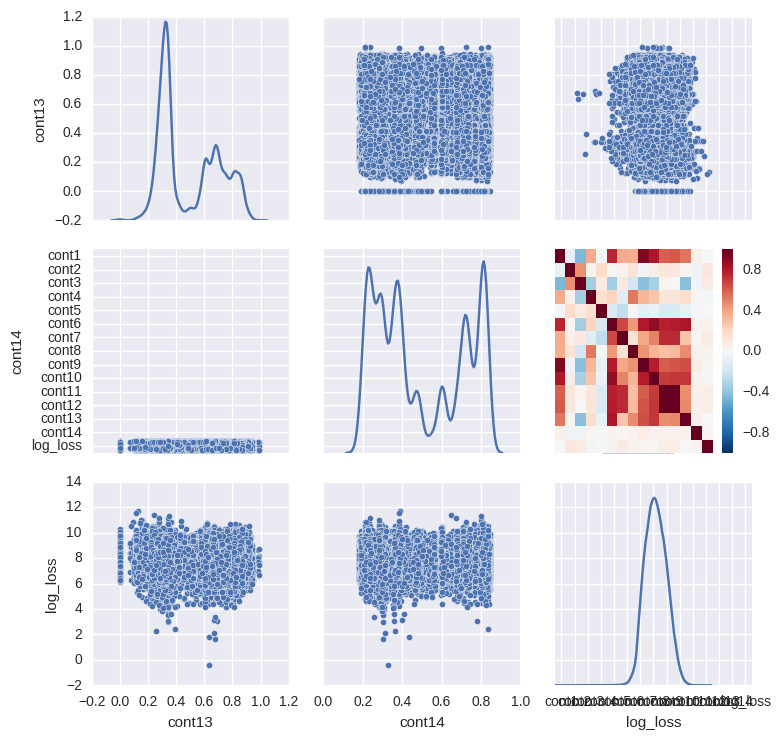

In [6]:
# continuous variables
for i in range(3):
    vars2plot = [cont_features[4*i], cont_features[4*i+1],
                 cont_features[4*i+2], cont_features[4*i+3], 'log_loss']
    sns.pairplot(train[cont_features + ['log_loss']], vars=vars2plot, kind='scatter', diag_kind='kde')
sns.pairplot(train[cont_features + ['log_loss']], vars=['cont13','cont14','log_loss'], kind='scatter', diag_kind='kde')

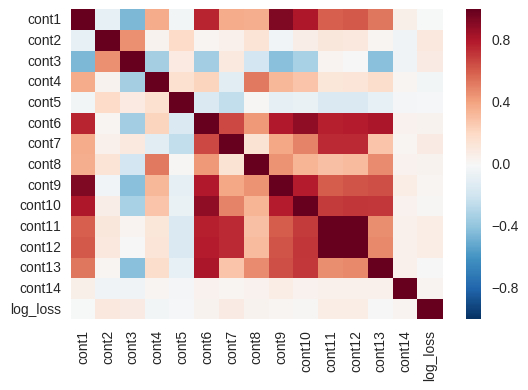

In [8]:
corr = train[cont_features + ['log_loss']].corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [31]:
# if categorical variables are factorized,
# are they then correlated with loss?
fact_cat_features = []
for cat_feature in cat_features:
    fact_cat_features.append(cat_feature + "_fact")
    train[cat_feature + "_fact"] = pd.factorize(train[cat_feature], sort=True)[0]
# for i in range(29):
#     vars2plot = [fact_cat_features[4*i], fact_cat_features[4*i+1],
#                  fact_cat_features[4*i+2], fact_cat_features[4*i+3], 'log_loss']
#     sns.pairplot(train[fact_cat_features + ['log_loss']], vars=vars2plot, kind='scatter', diag_kind='kde')


In [34]:
# Perhaps one hot encoding would work better because it doesnt seem like there is much meaning in the factorization
corr = train[fact_cat_features + ['log_loss']].corr()
np.absolute(corr['log_loss']).sort_values(ascending=False)

log_loss       1.000000
cat80_fact     0.474775
cat79_fact     0.402242
cat101_fact    0.378388
cat12_fact     0.336486
cat87_fact     0.324787
cat10_fact     0.298688
cat81_fact     0.272211
cat1_fact      0.265097
cat2_fact      0.263179
cat9_fact      0.249948
cat11_fact     0.239236
cat72_fact     0.238375
cat13_fact     0.233113
cat57_fact     0.221437
cat7_fact      0.205893
cat89_fact     0.196363
cat3_fact      0.194397
cat16_fact     0.191699
cat90_fact     0.188837
cat103_fact    0.184318
cat23_fact     0.180971
cat73_fact     0.180480
cat36_fact     0.176182
cat111_fact    0.175665
cat6_fact      0.167374
cat50_fact     0.161924
cat5_fact      0.130074
cat28_fact     0.129771
cat40_fact     0.127993
cat4_fact      0.123977
cat38_fact     0.123956
cat25_fact     0.113726
cat82_fact     0.106165
cat24_fact     0.100147
cat41_fact     0.095090
cat8_fact      0.093843
cat14_fact     0.092096
cat102_fact    0.088889
cat29_fact     0.082391
cat44_fact     0.081479
cat76_fact     0

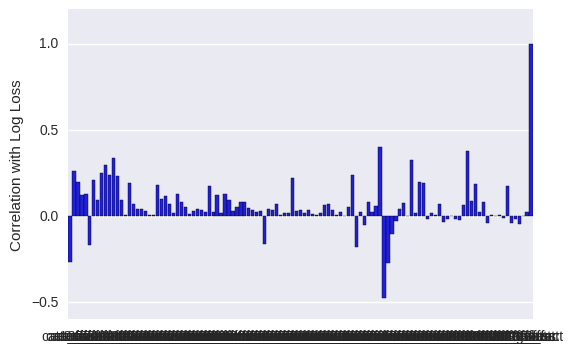

In [28]:
x = corr.columns.values
y = corr['log_loss']
(f, ax) = plt.subplots(1)
sns.barplot(x,y,color='blue',ax=ax)
ax.set_ylabel('Correlation with Log Loss')
